In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime


ticker = 'SUNPHARMA.NS'  
df = yf.download(ticker)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,1.812932,1.804799,1.803250,1.803250,1.414609,38730
1996-01-02,1.800926,1.800926,1.743219,1.743219,1.367517,77460
1996-01-03,1.743219,1.750578,1.750578,1.750578,1.373290,12910
1996-01-04,1.746705,1.758324,1.742832,1.742832,1.367212,64550
1996-01-05,1.738572,1.738572,1.738572,1.738572,1.363871,12910
...,...,...,...,...,...,...
2024-06-24,1475.050049,1502.900024,1475.050049,1494.500000,1494.500000,3726155
2024-06-25,1498.050049,1508.000000,1492.300049,1505.199951,1505.199951,1833311
2024-06-26,1502.000000,1528.900024,1495.250000,1521.150024,1521.150024,2563493


In [21]:
import numpy as np
data = df.filter(['Close'])

dataset = data.values

training_data_len = int(np.ceil( len(dataset) * .95 ))

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(20, len(train_data)):
    x_train.append(train_data[i-20:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 21:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(32))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=10, epochs=100)

[array([1.65604996e-04, 1.28724529e-04, 1.33245605e-04, 1.28486728e-04,
       1.25869599e-04, 8.08992112e-05, 5.11569489e-05, 1.04454912e-04,
       8.56580142e-05, 9.99339105e-05, 8.13747400e-05, 9.51750343e-05,
       8.08992112e-05, 7.37610068e-05, 5.30602358e-05, 5.71051231e-05,
       5.23463201e-05, 3.94976693e-05, 4.33048288e-05, 4.33048288e-05])]
[5.234632011552631e-05]

[array([1.65604996e-04, 1.28724529e-04, 1.33245605e-04, 1.28486728e-04,
       1.25869599e-04, 8.08992112e-05, 5.11569489e-05, 1.04454912e-04,
       8.56580142e-05, 9.99339105e-05, 8.13747400e-05, 9.51750343e-05,
       8.08992112e-05, 7.37610068e-05, 5.30602358e-05, 5.71051231e-05,
       5.23463201e-05, 3.94976693e-05, 4.33048288e-05, 4.33048288e-05]), array([1.28724529e-04, 1.33245605e-04, 1.28486728e-04, 1.25869599e-04,
       8.08992112e-05, 5.11569489e-05, 1.04454912e-04, 8.56580142e-05,
       9.99339105e-05, 8.13747400e-05, 9.51750343e-05, 8.08992112e-05,
       7.37610068e-05, 5.30602358e-05, 5.71051

In [22]:
predictions = model.predict(x_train)
# predictions = scaler.inverse_transform(predictions)
r2 = r2_score(y_train,predictions)
r2

212/212 [==============================] - 8s 18ms/step


0.9992191659616354

In [23]:
from  sklearn.metrics import r2_score
test_data = scaled_data[training_data_len - 20: , :]

x_test = []
y_test = scaled_data[training_data_len:, :]
for i in range(20, len(test_data)):
    x_test.append(test_data[i-20:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
# predictions = scaler.inverse_transform(predictions)
r2 = r2_score(y_test,predictions)
r2

12/12 [==============================] - 0s 15ms/step


0.9927184910779705

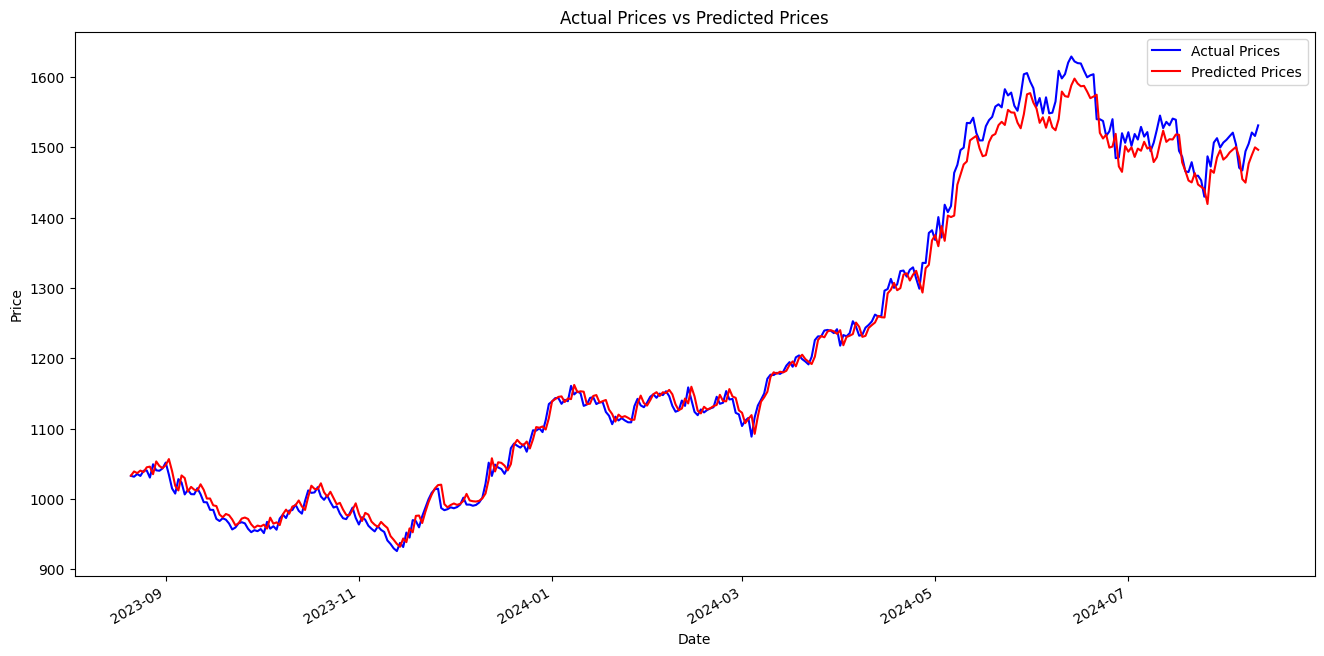

In [24]:
import matplotlib.pyplot as plt
y_test = scaler.inverse_transform(y_test)
predictions = scaler.inverse_transform(predictions)
test_dates = pd.date_range(start='2023-08-21', periods=len(y_test), freq='D')

# Plot the data
plt.figure(figsize=(16, 8))
plt.plot(test_dates, y_test, color='blue', label='Actual Prices')
plt.plot(test_dates, predictions, color='red', label='Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.gcf().autofmt_xdate()  # Rotate date labels for better readability
plt.show()

In [25]:
import joblib


model_file_path = '16.joblib'
scaler_file_path = 'scaler16.joblib'

joblib.dump(model, model_file_path)
joblib.dump(scaler, scaler_file_path)

print(f"Model saved to {model_file_path}")
print(f"Scaler saved to {scaler_file_path}")

Model saved to 16.joblib
Scaler saved to scaler16.joblib
